# 1. 활성화 함수 구현하기

### 계단함수

In [7]:
import numpy as np
import matplotlib.pylab as plt

In [3]:
def step_function_basic(x):
    if x > 0:
        return 1
    else:
        return 0

In [4]:
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [5]:
y = x > 0
y

array([False,  True,  True])

In [6]:
y = y.astype(np.int)
y

array([0, 1, 1])

In [8]:
# numpy로 구현
def step_function(x):
    y = x > 0
    return y.astype(np.int)

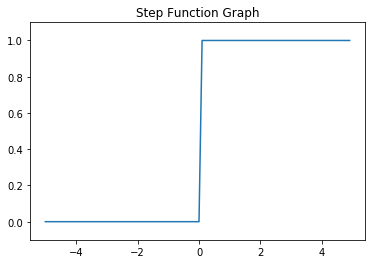

In [13]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.title("Step Function Graph")
plt.show()

### 시그모이드 함수

In [14]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [15]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

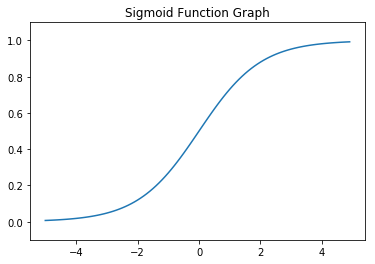

In [16]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.title("Sigmoid Function Graph")
plt.show()

### ReLU 함수

In [17]:
def relu(x):
    return np.maximum(0 ,x)

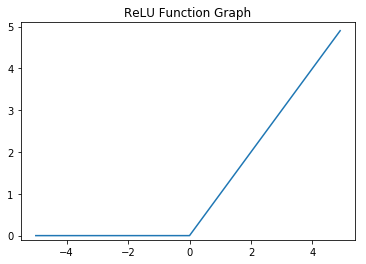

In [18]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x,y)
plt.ylim(-0.1,5.1)
plt.title("ReLU Function Graph")
plt.show()

# 2. 다차원 행렬의 계산

In [23]:
#행렬의 내적
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [24]:
A = np.array([[1,2],[3,4],[5,6]])
B = np.array([7,8])
np.dot(A,B)

array([23, 53, 83])

### 신경망의 내적

In [26]:
X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])
Y = np.dot(X,W)
print(Y)

[ 5 11 17]


# 3. 3층 신경망 구현하기

### 1층의 뉴런으로 가는 신호 구현하기

In [28]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

A1 = np.dot(X, W1) + B1
A1

array([0.3, 0.7, 1.1])

In [29]:
Z1 = sigmoid(A1)
Z1

array([0.57444252, 0.66818777, 0.75026011])

### 1층에서 2층으로 전달

In [30]:
W2 = np.array([[0.1, 0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])
A2 = np.dot(Z1,W2) + B2
A2

array([0.51615984, 1.21402696])

In [32]:
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

### 2층에서 출력층으로 신호 전달

In [33]:
W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2, W3) + B3
Y = A3
Y

array([0.31682708, 0.69627909])

### 3층 신경망 구현 정리

In [34]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1, 0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    return a3

network = init_network()
x = np.array([1.0,0.5])
y = forward(network, x)
y

array([0.31682708, 0.69627909])

# 4. 출력층 설계하기

### Softmax function 구현

In [35]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
sum_exp_a = np.sum(exp_a)
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [37]:
def softmax_1(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

In [38]:
#overflow 문제가 생김
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

C:\Users\kim taeyeoun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\kim taeyeoun\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [39]:
c = np.max(a)
np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [40]:
# overflow 문제를 해결한 softmax 함수
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

### softmax 함수의 특징

##### 확률로 해석 할 수 있다

In [42]:
a = np.array([4, 0.7, 2.3])
y = softmax(a)
print(y)  #함수 결과는 0과 1 사이로 나온다
print(np.sum(y))  #출력 총합은 1이 된다

[0.81996336 0.03024285 0.1497938 ]
1.0
